In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [20]:
# Load training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display first few rows of the train data to understand structure
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
# Identify columns with missing values
train_data.isnull().sum()

# For numerical features, fill missing values with median
num_features = train_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
train_data[num_features] = imputer.fit_transform(train_data[num_features])

# For categorical features, fill missing values with the mode (most frequent)
cat_features = train_data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
train_data[cat_features] = imputer_cat.fit_transform(train_data[cat_features])

# Checking if all missing values are handled
train_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Encoding categorical features
label_encoder = LabelEncoder()

# Columns to encode
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding
for col in cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Check the encoded data
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [23]:
# Drop unnecessary columns like 'Loan_ID' which is unique and doesn't help in prediction
train_data.drop(['Loan_ID'], axis=1, inplace=True)

# Check the remaining columns
train_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [27]:
# Features and target
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Handle non-numeric values in the 'Dependents' column (handling '3+')
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(float)

# Check if 'Loan_ID' exists and drop it if it does
if 'Loan_ID' in train_data.columns:
    train_data.drop(['Loan_ID'], axis=1, inplace=True)
else:
    print("'Loan_ID' column not found in the DataFrame.")

# Encode categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns that need encoding
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding for categorical columns
for col in cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Split the data into features (X) and target (y)
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


'Loan_ID' column not found in the DataFrame.


In [31]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [33]:
# Predicting on test data
rf_y_pred = rf_model.predict(X_test_scaled)
lr_y_pred = lr_model.predict(X_test_scaled)

# Accuracy scores
rf_accuracy = accuracy_score(y_test, rf_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

# Classification Report
rf_report = classification_report(y_test, rf_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

# Print Results
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("\nRandom Forest Classification Report:\n", rf_report)
print("\nLogistic Regression Classification Report:\n", lr_report)


Random Forest Accuracy: 0.7479674796747967
Logistic Regression Accuracy: 0.7886178861788617

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



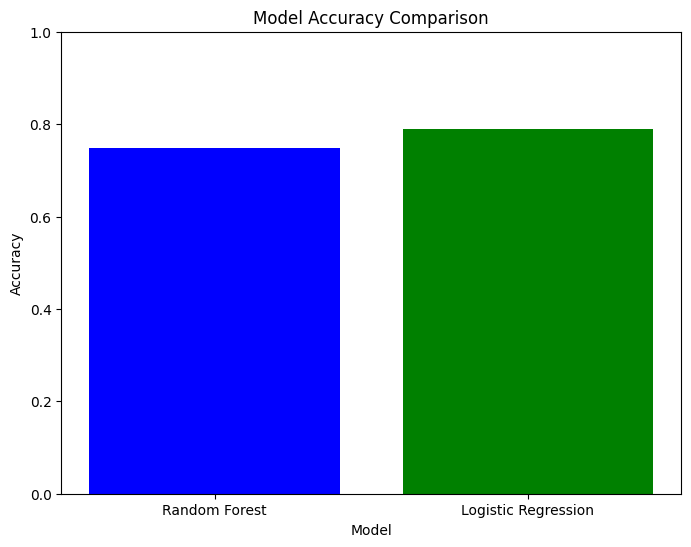

In [34]:
# Visualize model performance
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [35]:
# Cross-validation scores
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)

# Print cross-validation results
print(f"Random Forest Cross-validation Mean Accuracy: {rf_cv_scores.mean()}")
print(f"Logistic Regression Cross-validation Mean Accuracy: {lr_cv_scores.mean()}")


Random Forest Cross-validation Mean Accuracy: 0.7850459816073571
Logistic Regression Cross-validation Mean Accuracy: 0.8061975209916034


C:\Users\Naweed Ibrahimi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naweed Ibrahimi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://s